# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 8

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [19]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [21]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
325,Darlow,Newcastle Utd,50,7.954545,35,38.846267,4.4,4.883531,5.122548,4.898206,2.183981
431,Fabianski,West Ham,50,8.039216,41,38.685461,5.1,4.812094,6.178293,4.898091,2.152034
12,Martínez,Aston Villa,48,7.017544,40,30.922020,5.7,4.406388,3.686105,4.743426,2.011232
96,Pope,Burnley,54,7.073171,29,30.152543,4.1,4.262946,4.953950,4.205176,1.834480
455,Patrício,Wolves,55,8.000000,40,34.132377,5.0,4.266547,5.415087,4.029477,1.819262
217,Schmeichel,Leicester City,55,8.095238,34,33.912287,4.2,4.189165,4.874398,4.081012,1.786266
252,Alisson,Liverpool,59,6.052632,23,24.750504,3.8,4.089214,3.460462,4.061100,1.683503
363,McCarthy,Southampton,45,8.048780,33,28.126336,4.1,3.494484,4.585858,3.769803,1.647316
8,Leno,Arsenal,50,8.000000,28,29.168153,3.5,3.646019,4.218111,3.734896,1.630549


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
389,Aurier,Tottenham,52,2.000000,13,12.619906,6.5,6.309953,6.081085,5.978405,2.767098
277,Cancelo,Manchester City,54,4.000000,24,22.807690,6.0,5.701923,6.383358,5.992432,2.453717
470,Kilman,Wolves,43,5.000000,30,23.689673,6.0,4.737935,5.313294,4.490793,2.284835
563,Ait Nouri,Wolves,50,2.000000,17,10.133094,8.5,5.066547,5.196761,4.816888,2.265829
232,Chilwell,Chelsea,60,5.000000,41,26.406925,8.2,5.281385,6.243458,5.221466,2.156116
435,Cresswell,West Ham,51,7.916667,38,36.008630,4.8,4.548459,5.556830,4.749139,2.014091
558,Coufal,West Ham,45,5.000000,25,20.837760,5.0,4.167552,4.396936,4.298944,1.964603
498,Castagne,Leicester City,57,6.034483,35,27.650662,5.8,4.582110,3.324783,4.487153,1.919235
461,Saïss,Wolves,52,6.031746,38,26.339490,6.3,4.366810,5.527305,4.110956,1.914973


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
33,Hourihane,Aston Villa,60,2.000000,17,13.050132,8.5,6.525066,NaN,6.387434,2.663847
37,Grealish,Aston Villa,74,6.976744,60,46.862071,8.6,6.716897,7.978918,6.509133,2.469180
141,Zaha,Crystal Palace,74,7.941176,54,48.212548,6.8,6.071210,6.640317,6.066683,2.231821
105,Jorginho,Chelsea,52,6.981132,37,34.860317,5.3,4.993505,4.640652,4.976275,2.189797
390,Son,Tottenham,96,8.043478,74,53.191317,9.2,6.612975,7.228917,6.410939,2.134328
254,Salah,Liverpool,124,7.976190,67,59.131449,8.4,7.413495,7.077624,6.889358,2.105291
114,Ziyech,Chelsea,81,3.970588,27,22.559875,6.8,5.681746,5.630444,5.665496,1.996362
450,Fornals,West Ham,64,8.076923,42,40.503536,5.2,5.014723,5.884738,5.309748,1.982244
251,Mané,Liverpool,120,6.969697,46,47.726262,6.6,6.847681,5.490463,6.364792,1.976755


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
388,Kane,Tottenham,110,8.000000,80,70.695502,10.0,8.836938,8.572076,8.618913,2.664437
506,Wilson,Newcastle Utd,66,7.971014,55,50.673876,6.9,6.357268,6.893869,6.656240,2.474563
514,Watkins,Aston Villa,60,7.014925,47,42.176938,6.7,6.012457,7.180165,5.710234,2.454575
202,Bamford,Leeds United,60,8.055556,58,47.513876,7.2,5.898274,5.860000,5.779823,2.407960
224,Vardy,Leicester City,101,7.023810,59,52.333876,8.4,7.450925,7.544385,7.550627,2.344496
68,Maupay,Brighton,65,7.037037,38,38.196938,5.4,5.427986,4.350000,5.304611,2.129031
164,Calvert-Lewin,Everton,78,8.028169,57,44.756938,7.1,5.574987,4.051388,5.522902,1.996166
282,Jesus,Manchester City,93,2.000000,15,11.800000,7.5,5.900000,7.700000,6.062996,1.934686
377,Adams,Southampton,59,8.039216,41,37.570813,5.1,4.673443,5.315961,4.610645,1.924026


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.loc[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
254,Salah,Liverpool,124,7.976190,67,59.131449,8.4,7.413495,6.566090,2.105291
251,Mané,Liverpool,120,6.969697,46,47.726262,6.6,6.847681,6.063124,1.976755
37,Grealish,Aston Villa,74,6.976744,60,46.862071,8.6,6.716897,6.180557,2.469180
390,Son,Tottenham,96,8.043478,74,53.191317,9.2,6.612975,6.565098,2.134328
33,Hourihane,Aston Villa,60,2.000000,17,13.050132,8.5,6.525066,6.127862,2.663847
141,Zaha,Crystal Palace,74,7.941176,54,48.212548,6.8,6.071210,5.668019,2.231821
302,Fernandes,Manchester Utd,105,6.973684,53,42.154990,7.6,6.044866,7.501870,1.865486
272,De Bruyne,Manchester City,115,6.000000,27,34.492346,4.5,5.748724,4.952571,1.695206
114,Ziyech,Chelsea,81,3.970588,27,22.559875,6.8,5.681746,5.701338,1.996362


In [32]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
389,Aurier,Tottenham,52,2.000000,6.5,6.309953,6.081085,6.268287,5.978405,2.767098
388,Kane,Tottenham,110,8.000000,10.0,8.836938,8.572076,8.768391,8.618913,2.664437
33,Hourihane,Aston Villa,60,2.000000,8.5,6.525066,NaN,6.127862,6.387434,2.663847
506,Wilson,Newcastle Utd,66,7.971014,6.9,6.357268,6.893869,6.097257,6.656240,2.474563
37,Grealish,Aston Villa,74,6.976744,8.6,6.716897,7.978918,6.180557,6.509133,2.469180
514,Watkins,Aston Villa,60,7.014925,6.7,6.012457,7.180165,5.412862,5.710234,2.454575
277,Cancelo,Manchester City,54,4.000000,6.0,5.701923,6.383358,4.923743,5.992432,2.453717
202,Bamford,Leeds United,60,8.055556,7.2,5.898274,5.860000,5.931252,5.779823,2.407960
224,Vardy,Leicester City,101,7.023810,8.4,7.450925,7.544385,7.483310,7.550627,2.344496


In [10]:
metric = 'form 5'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
388,Kane,Tottenham,110,8.000000,80,70.695502,10.0,8.836938,8.572076,8.618913,2.664437
282,Jesus,Manchester City,93,2.000000,15,11.800000,7.5,5.900000,7.700000,6.062996,1.934686
224,Vardy,Leicester City,101,7.023810,59,52.333876,8.4,7.450925,7.544385,7.550627,2.344496
514,Watkins,Aston Villa,60,7.014925,47,42.176938,6.7,6.012457,7.180165,5.710234,2.454575
506,Wilson,Newcastle Utd,66,7.971014,55,50.673876,6.9,6.357268,6.893869,6.656240,2.474563
202,Bamford,Leeds United,60,8.055556,58,47.513876,7.2,5.898274,5.860000,5.779823,2.407960
492,Rodrigo,Leeds United,58,6.000000,18,21.656938,3.0,3.609490,5.722840,3.538225,1.498759
117,Werner,Chelsea,94,7.962963,43,36.813876,5.4,4.623138,5.338207,4.621233,1.507901
377,Adams,Southampton,59,8.039216,41,37.570813,5.1,4.673443,5.315961,4.610645,1.924026


In [11]:
metric = 'next5_xP'

display(df[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
254,Salah,Liverpool,124,7.976190,67,59.131449,8.4,7.413495,6.889358,2.105291
37,Grealish,Aston Villa,74,6.976744,60,46.862071,8.6,6.716897,6.509133,2.469180
390,Son,Tottenham,96,8.043478,74,53.191317,9.2,6.612975,6.410939,2.134328
33,Hourihane,Aston Villa,60,2.000000,17,13.050132,8.5,6.525066,6.387434,2.663847
251,Mané,Liverpool,120,6.969697,46,47.726262,6.6,6.847681,6.364792,1.976755
302,Fernandes,Manchester Utd,105,6.973684,53,42.154990,7.6,6.044866,6.160305,1.865486
141,Zaha,Crystal Palace,74,7.941176,54,48.212548,6.8,6.071210,6.066683,2.231821
272,De Bruyne,Manchester City,115,6.000000,27,34.492346,4.5,5.748724,5.999940,1.695206
114,Ziyech,Chelsea,81,3.970588,27,22.559875,6.8,5.681746,5.665496,1.996362


In [12]:
metric = 'xG+xA'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
388,Kane,Tottenham,110,8.000000,10.0,8.836938,8.768391,2.664437,5.9,3.6,9.5,1.187500
224,Vardy,Leicester City,101,7.023810,8.4,7.450925,7.483310,2.344496,7.3,0.9,8.2,1.167458
254,Salah,Liverpool,124,7.976190,8.4,7.413495,6.566090,2.105291,5.8,2.0,7.8,0.977910
506,Wilson,Newcastle Utd,66,7.971014,6.9,6.357268,6.097257,2.474563,5.6,0.8,6.4,0.802909
251,Mané,Liverpool,120,6.969697,6.6,6.847681,6.063124,1.976755,4.3,1.7,6.0,0.860870
164,Calvert-Lewin,Everton,78,8.028169,7.1,5.574987,5.713972,1.996166,5.1,0.4,5.5,0.685088
514,Watkins,Aston Villa,60,7.014925,6.7,6.012457,5.412862,2.454575,5.0,0.5,5.5,0.784043
202,Bamford,Leeds United,60,8.055556,7.2,5.898274,5.931252,2.407960,5.0,0.4,5.4,0.670345
390,Son,Tottenham,96,8.043478,9.2,6.612975,6.565098,2.134328,3.5,1.9,5.4,0.671351


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86,0,0,16,100.0,100.0,0,44683,NaN,NaN,0,0,-2,2,24.0,232,35,NaN,NaN,0,4,1.0,1.0,1,Jay,1.0,5,0,6.0,317,41,False,12.2,355,36,153,NaN,2020-09-24T00:00:15.736033Z,58,0,0,3.0,0,NaN,44683.jpg,1.0,0,0,Rodriguez,0.3,False,...,2.2,0.3,0.0,1.4,0.0,0.0,0.0,NaN,NaN,NaN,0.6,0.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6,0.0,0.0,0.0,1.3,0.0,0.0,1.0,0.0,0.1,0.0,1.075,1.32806,1.288312,1.314355,0.224138,0.539796,0.4,0.08


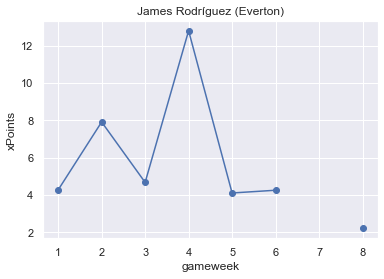

In [40]:
# find player index
name_string = 'Rodrigu'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 508
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,20,0.0,0.0,1,176413,NaN,NaN,-1,1,-3,3,14.1,278,151,NaN,NaN,0,3,0.0,0.0,0,Christian,1.2,2,0,11.3,245,112,False,26.4,306,129,173,Hamstring injury - Unknown return date,2020-10-31T18:00:12.906132Z,82,0,0,NaN,0,NaN,176413.jpg,2.0,0,0,Pulisic,2.2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,2.910803,0.1,0.0,2.2,0.0,0.1,0.0,2.996585,0.1,0.0,0.7,1.0,0.0,0.0,NaN,NaN,NaN,0.4,0.0,NaN,NaN,2.302463,2.463204,2.409557,2.387191,0.295689,0.846725,0.3,0.1


In [34]:
my_starting11 = [363,259,77,239,254,302,141,508,114,202,388]
my_subs = [35,200,146,262]

In [35]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,45,8.048780,4.1,3.494484,4.585858,4.016170,3.769803,1.647316
259,Alexander-Arnold,Liverpool,74,8.076923,2.6,3.792371,3.270496,3.370860,3.643848,1.394103
77,Lamptey,Brighton,47,8.055556,3.6,3.944335,3.977314,3.466695,3.609267,1.819386
239,Justin,Leicester City,48,8.095238,4.2,3.590904,3.594398,2.730636,3.491694,1.639016
254,Salah,Liverpool,124,7.976190,8.4,7.413495,7.077624,6.566090,6.889358,2.105291
302,Fernandes,Manchester Utd,105,6.973684,7.6,6.044866,6.376661,7.501870,6.160305,1.865486
141,Zaha,Crystal Palace,74,7.941176,6.8,6.071210,6.640317,5.668019,6.066683,2.231821
508,Rodríguez,Everton,79,7.049180,6.1,5.492247,5.838771,5.617639,5.437697,1.954054
114,Ziyech,Chelsea,81,3.970588,6.8,5.681746,5.630444,5.701338,5.665496,1.996362



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN
200,Dallas,Leeds United,45,8.064516,3.1,2.474573,2.854098,2.745304,2.444761,1.166525
146,Mitchell,Crystal Palace,42,6.000000,2.5,2.663117,2.062231,3.325947,2.896673,1.299468
262,Brewster,Sheffield Utd,45,4.000000,1.5,1.800000,1.800000,1.791609,1.796054,0.848528


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)